# TP scientific analisys

## Natalia Debandi

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO


In [31]:
#leo el archivo desde mi computadora
online = False
if (online == True):
    url = requests.get('https://drive.google.com/file/d/1xS091zSODR9431r7GNJI4IYHoFRCCQCr/view?usp=sharing')
    csv_raw = StringIO(url.text)
    signals = pd.read_csv(csv_raw, delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
else:
    signals = pd.read_csv('C:\\Users\\natal\\OneDrive\\Nat2022\\Analisis datos\\datasets\\datos-cientificos\\eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

##lo guarde en el proyecto
##base = pd.read_csv('TPfinal\\data\\eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

print('Estructura de la informacion :')
print('signals')
print(signals.head())

Estructura de la informacion :
signals
      timestamp  counter  eeg  attention  meditation  blinking
0  1.655925e+09       68   32          0           0         0
1  1.655925e+09       69   40          0           0         0
2  1.655925e+09       70   42          0           0         0
3  1.655925e+09       71   34          0           0         0
4  1.655925e+09       72   24          0           0         0


In [32]:
##tomo los valores de eeg en un tensor de nunpy
data=signals.values
eeg_val=data[:,2]
print(eeg_val)

[ 32.  40.  42. ...  91. 114. 103.]


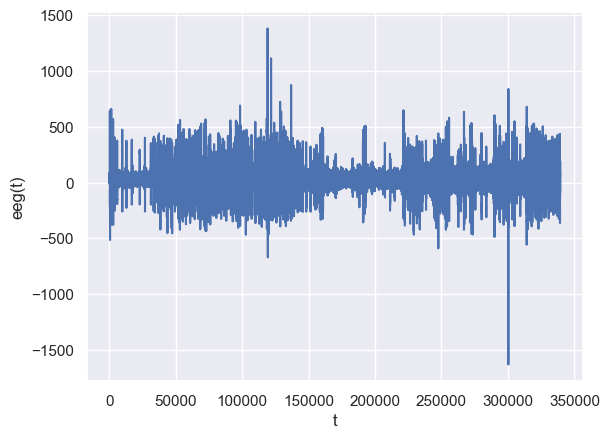

In [33]:
plt.plot(eeg_val,'b', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');

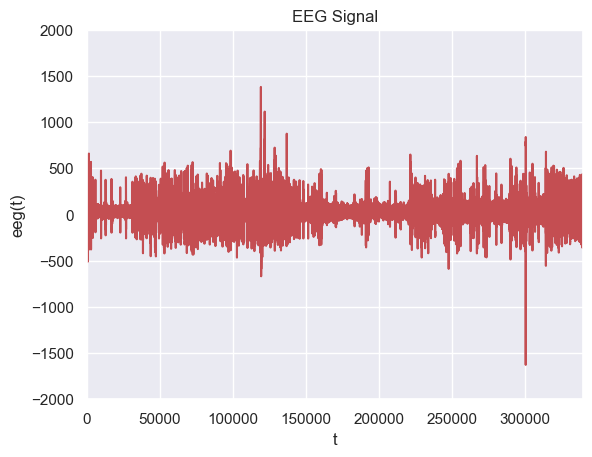

In [34]:
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()


In [35]:
signals.describe()

,timestamp,counter,eeg,attention,meditation,blinking
count,3.393010e+05,339301.000000,339301.000000,339301.000000,339301.000000,339301.0
mean,1.655925e+09,49.501127,31.001577,64.062720,41.658757,0.0
std,1.905190e+02,28.867526,90.962463,21.247321,17.424993,0.0
min,1.655925e+09,0.000000,-1628.000000,0.000000,0.000000,0.0
25%,1.655925e+09,24.000000,3.000000,47.000000,29.000000,0.0
50%,1.655925e+09,50.000000,33.000000,64.000000,41.000000,0.0
75%,1.655925e+09,75.000000,60.000000,81.000000,53.000000,0.0
max,1.655925e+09,99.000000,1380.000000,100.000000,100.000000,0.0


In [36]:
#import seaborn as sns
#sns.set(style="darkgrid")
#sns.lineplot(x="timestamp", y="eeg", hue="attention", data=signals)
#import matplotlib.pyplot as plt
#plt.show()

In [37]:
signals.head()

,timestamp,counter,eeg,attention,meditation,blinking
0,1.655925e+09,68,32,0,0,0
1,1.655925e+09,69,40,0,0,0
2,1.655925e+09,70,42,0,0,0
3,1.655925e+09,71,34,0,0,0
4,1.655925e+09,72,24,0,0,0


In [38]:
#quiero pasar el timestamp a fecha para poder sincronizar con el video

from datetime import datetime
signals.loc[1].iat[0]
fecha=datetime.fromtimestamp(signals.loc[1].iat[0])
print(fecha)

2022-06-22 16:06:04.970000


In [39]:
signals.dtypes
signals['date']=pd.to_datetime(signals['timestamp'], unit='s')
signals.head()

,timestamp,counter,eeg,attention,meditation,blinking,date
0,1.655925e+09,68,32,0,0,0,2022-06-22 19:06:04.970000128
1,1.655925e+09,69,40,0,0,0,2022-06-22 19:06:04.970000128
2,1.655925e+09,70,42,0,0,0,2022-06-22 19:06:04.970000128
3,1.655925e+09,71,34,0,0,0,2022-06-22 19:06:04.970000128
4,1.655925e+09,72,24,0,0,0,2022-06-22 19:06:04.970000128


El primer valor de la serie es 2022-06-22 19:06 mientras que el video arranca en el 2022-06-22 20:05.
El maximo valor de date es '2022-06-22 19:17:04.920000'

In [40]:
##reviso la diferencia entre los horarios para ver como sincronizar con el video
from datetime import datetime, timedelta

#create new column that contains timedelta between start and end
diff =  pd.to_datetime('2022-06-22 20:05') -  pd.to_datetime('2022-06-22 19:06')
#print(diff)

result = signals['date'].iat[0] + timedelta(minutes=59)
print(result)

2022-06-22 20:05:04.970000128


In [41]:
# sumo la diferencia de 59 minutos para sincronizar mejor con el video
signals['date']=signals['date'] + timedelta(minutes=59)
#signals.head()

In [42]:
#signals_filtered=signals[]
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.lineplot(x="date", y="eeg", data=signals)
#plt.show()


# Señal baseline

La Señal baseline la tomo desde el inicio hasta el 07:20 que arranca la secuencia de la tos.

In [43]:
#quiero filtrar una parte de la señal
signals_baseline=signals[signals.date <'2022-06-22 20:07:20']
signals_baseline.head()
#signals_baseline.describe()

,timestamp,counter,eeg,attention,meditation,blinking,date
0,1.655925e+09,68,32,0,0,0,2022-06-22 20:05:04.970000128
1,1.655925e+09,69,40,0,0,0,2022-06-22 20:05:04.970000128
2,1.655925e+09,70,42,0,0,0,2022-06-22 20:05:04.970000128
3,1.655925e+09,71,34,0,0,0,2022-06-22 20:05:04.970000128
4,1.655925e+09,72,24,0,0,0,2022-06-22 20:05:04.970000128


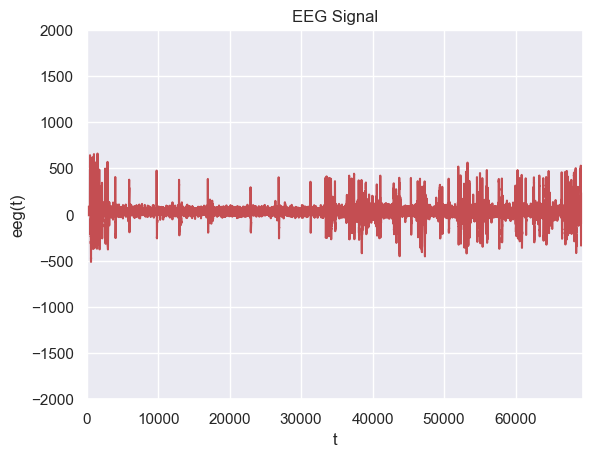

In [44]:
data=signals_baseline.values
eeg_val=data[:,2]
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

# Analizo la parte de la tos

Son 60 segundos desde 07:20. A partir de acá cada una de los cambios se produce cada 60 segundos aparoximadamente

In [45]:
#filtro los datos de tos
signals_tos=signals[(signals.date >'2022-06-22 20:07:20') & (signals.date <'2022-06-22 20:08:20')]
signals_tos.head()
#signals_tos.describe()

,timestamp,counter,eeg,attention,meditation,blinking,date
69403,1.655925e+09,11,23,35,26,0,2022-06-22 20:07:20.009999872
69404,1.655925e+09,12,22,35,26,0,2022-06-22 20:07:20.009999872
69405,1.655925e+09,13,35,35,26,0,2022-06-22 20:07:20.009999872
69406,1.655925e+09,14,54,35,26,0,2022-06-22 20:07:20.009999872
69407,1.655925e+09,15,61,35,26,0,2022-06-22 20:07:20.009999872


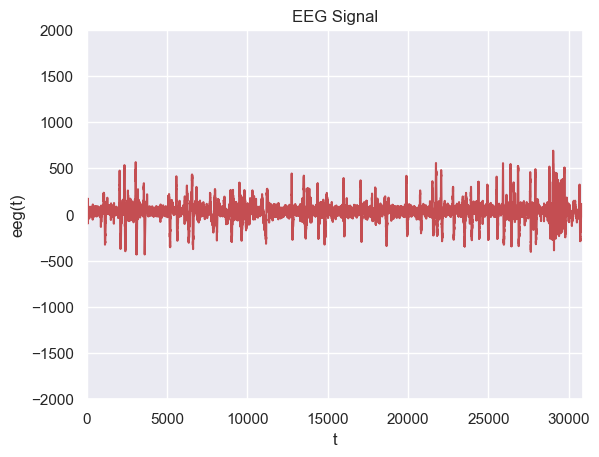

In [46]:
data=signals_tos.values
eeg_val=data[:,2]
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

# reconstruccion de señal con etiquetas
Reconstruyo una señal con la parte del baseline y de la tos nada más con la etiqueta de tos (1). Voy a trabajar analizando esta señal mas chica para probar aplicar filtros y extraer features.

In [47]:
zz=np.zeros(signals_baseline['date'].size,dtype=int)
signals_baseline = signals_baseline.assign(tos=zz)
#print(zz)
signals_baseline.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,tos
0,1.655925e+09,68,32,0,0,0,2022-06-22 20:05:04.970000128,0
1,1.655925e+09,69,40,0,0,0,2022-06-22 20:05:04.970000128,0
2,1.655925e+09,70,42,0,0,0,2022-06-22 20:05:04.970000128,0
3,1.655925e+09,71,34,0,0,0,2022-06-22 20:05:04.970000128,0
4,1.655925e+09,72,24,0,0,0,2022-06-22 20:05:04.970000128,0


In [48]:
zz=np.ones(signals_tos['date'].size,dtype=int)
signals_tos = signals_tos.assign(tos=zz)
#print(zz)
signals_tos.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,tos
69403,1.655925e+09,11,23,35,26,0,2022-06-22 20:07:20.009999872,1
69404,1.655925e+09,12,22,35,26,0,2022-06-22 20:07:20.009999872,1
69405,1.655925e+09,13,35,35,26,0,2022-06-22 20:07:20.009999872,1
69406,1.655925e+09,14,54,35,26,0,2022-06-22 20:07:20.009999872,1
69407,1.655925e+09,15,61,35,26,0,2022-06-22 20:07:20.009999872,1


In [49]:
##uno los dos subconjuntos
signals2=pd.concat([signals_baseline, signals_tos])
signals2.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,tos
0,1.655925e+09,68,32,0,0,0,2022-06-22 20:05:04.970000128,0
1,1.655925e+09,69,40,0,0,0,2022-06-22 20:05:04.970000128,0
2,1.655925e+09,70,42,0,0,0,2022-06-22 20:05:04.970000128,0
3,1.655925e+09,71,34,0,0,0,2022-06-22 20:05:04.970000128,0
4,1.655925e+09,72,24,0,0,0,2022-06-22 20:05:04.970000128,0


In [50]:
signals2.describe()

,timestamp,counter,eeg,attention,meditation,blinking,tos
count,1.002730e+05,100273.000000,100273.000000,100273.000000,100273.000000,100273.0,100273.00000
mean,1.655925e+09,49.503376,30.932494,65.938318,32.231847,0.0,0.30786
std,5.630478e+01,28.871847,93.487519,22.491407,15.314495,0.0,0.46161
min,1.655925e+09,0.000000,-514.000000,0.000000,0.000000,0.0,0.00000
25%,1.655925e+09,24.000000,8.000000,48.000000,21.000000,0.0,0.00000
50%,1.655925e+09,50.000000,34.000000,67.000000,30.000000,0.0,0.00000
75%,1.655925e+09,75.000000,57.000000,84.000000,43.000000,0.0,1.00000
max,1.655925e+09,99.000000,690.000000,100.000000,70.000000,0.0,1.00000


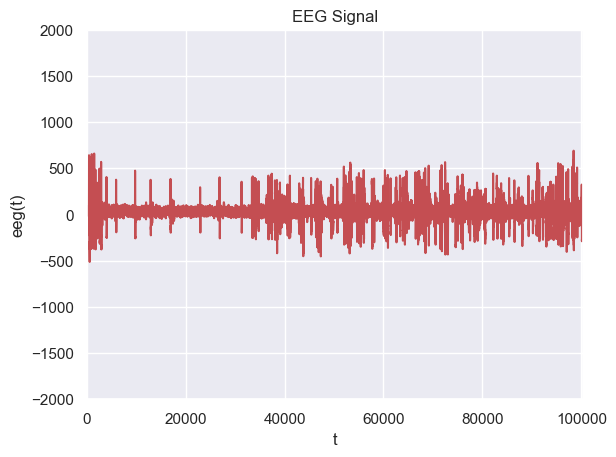

In [51]:
data=signals2.values
eeg_val=data[:,2]
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

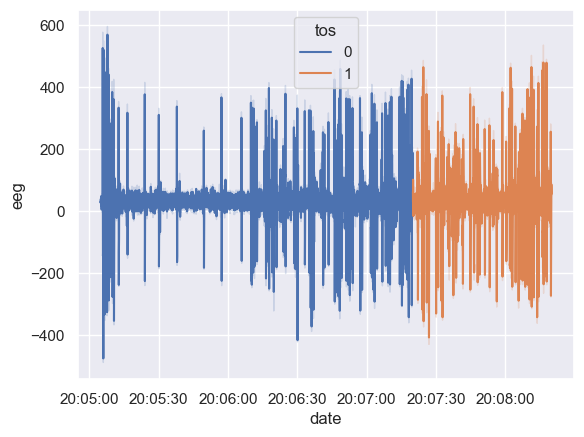

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.lineplot(x="date", y="eeg",  hue="tos", data=signals2)
plt.show()

## Pruebo aplicando filtros temporales a la señal para eliminar el ruido

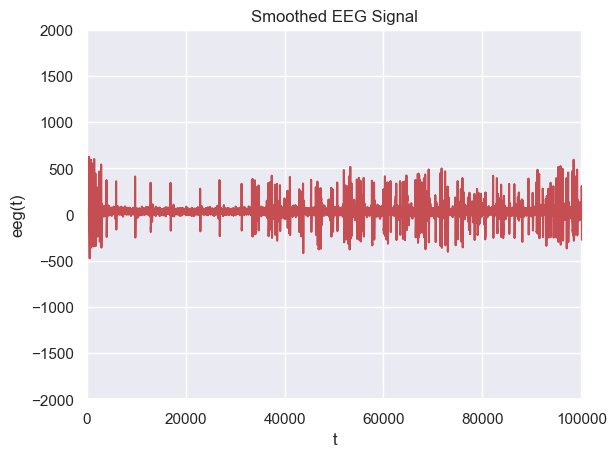

In [53]:
data = signals2.values

eeg = data[:,2]

# La operación de convolución permite implementar el suavizado del Moving Average
windowlength = 10
avgeeg = np.convolve(eeg, np.ones((windowlength,))/windowlength, mode='same')

# El kernel/máscara está compuesto de 10 valores de 1/10.  Cuando esos valores se suman para cada posición, implica que se reemplaza el valor por el promedio
# de los 5 valores anteriores y 4 posteriores.

signals2['eegavg']=avgeeg

plt.plot(avgeeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'Smoothed EEG Signal')     
plt.ylim([-2000, 2000]);
plt.xlim([0,len(avgeeg)])
plt.show()


In [54]:
signals2.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,tos,eegavg
0,1.655925e+09,68,32,0,0,0,2022-06-22 20:05:04.970000128,0,17.2
1,1.655925e+09,69,40,0,0,0,2022-06-22 20:05:04.970000128,0,20.0
2,1.655925e+09,70,42,0,0,0,2022-06-22 20:05:04.970000128,0,23.4
3,1.655925e+09,71,34,0,0,0,2022-06-22 20:05:04.970000128,0,26.9
4,1.655925e+09,72,24,0,0,0,2022-06-22 20:05:04.970000128,0,29.4


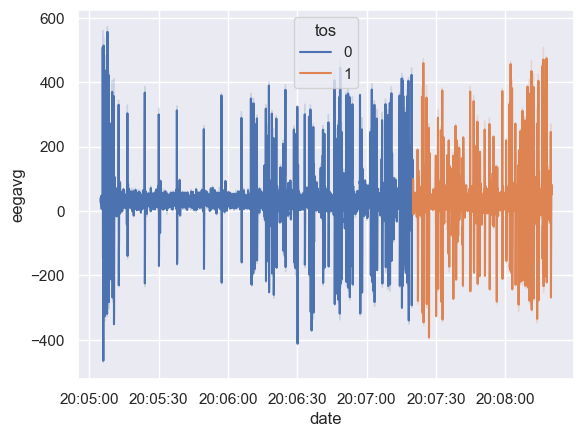

In [55]:
sns.set(style="darkgrid")
sns.lineplot(x="date", y="eegavg",  hue="tos", data=signals2)
plt.show()

# Extracción de features de la señal

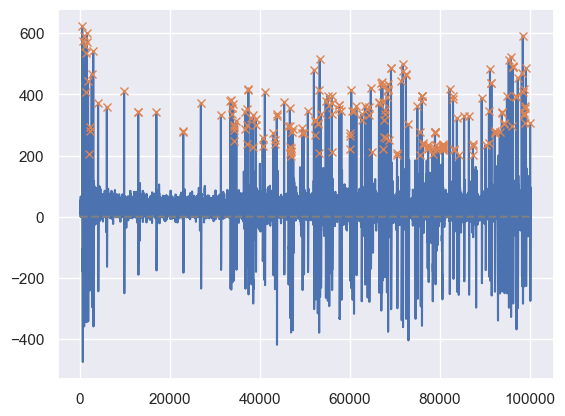

In [58]:
#lo primero quiero identificar los picos
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(avgeeg, height=200)
plt.plot(avgeeg)
plt.plot(peaks, avgeeg[peaks], "x")
plt.plot(np.zeros_like(avgeeg), "--", color="gray")
plt.show()

In [70]:
#funciones para extraer features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft

import math

from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord

from scipy.signal import butter, lfilter

import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq

def crest_factor(x):
    return np.max(np.abs(x))/np.sqrt(np.mean(np.square(x)))

def hjorth(a):
    r"""
    Compute Hjorth parameters [HJO70]_.
    .. math::
        Activity = m_0 = \sigma_{a}^2
    .. math::
        Complexity = m_2 = \sigma_{d}/ \sigma_{a}
    .. math::
        Morbidity = m_4 =  \frac{\sigma_{dd}/ \sigma_{d}}{m_2}
    Where:
    :math:`\sigma_{x}^2` is the mean power of a signal :math:`x`. That is, its variance, if it's mean is zero.
    :math:`a`, :math:`d` and :math:`dd` represent the original signal, its first and second derivatives, respectively.
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which appear to uses a non normalised (by the length of the signal) definition of the activity:
        .. math::
            \sigma_{a}^2 = \sum{\mathbf{x}[i]^2}
        As opposed to
        .. math::
            \sigma_{a}^2 = \frac{1}{n}\sum{\mathbf{x}[i]^2}
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: activity, complexity and morbidity
    :rtype: tuple(float, float, float)
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> activity, complexity, morbidity = pr.univariate.hjorth(noise)
    """

    first_deriv = np.diff(a)
    second_deriv = np.diff(a,2)

    var_zero = np.mean(a ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    morbidity = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / morbidity

    return activity, morbidity, complexity

def pfd(a):
    r"""
    Compute Petrosian Fractal Dimension of a time series [PET95]_.
    It is defined by:
    .. math::
        \frac{log(N)}{log(N) + log(\frac{N}{N+0.4N_{\delta}})}
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which implemented an apparently erroneous formulae:
        .. math::
            \frac{log(N)}{log(N) + log(\frac{N}{N}+0.4N_{\delta})}
    Where:
    :math:`N` is the length of the time series, and
    :math:`N_{\delta}` is the number of sign changes.
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: the Petrosian Fractal Dimension; a scalar.
    :rtype: float
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> pr.univariate.pdf(noise)
    """

    diff = np.diff(a)
    # x[i] * x[i-1] for i in t0 -> tmax
    prod = diff[1:-1] * diff[0:-2]

    # Number of sign changes in derivative of the signal
    N_delta = np.sum(prod < 0)
    n = len(a)

    return np.log(n)/(np.log(n)+np.log(n/(n+0.4*N_delta)))

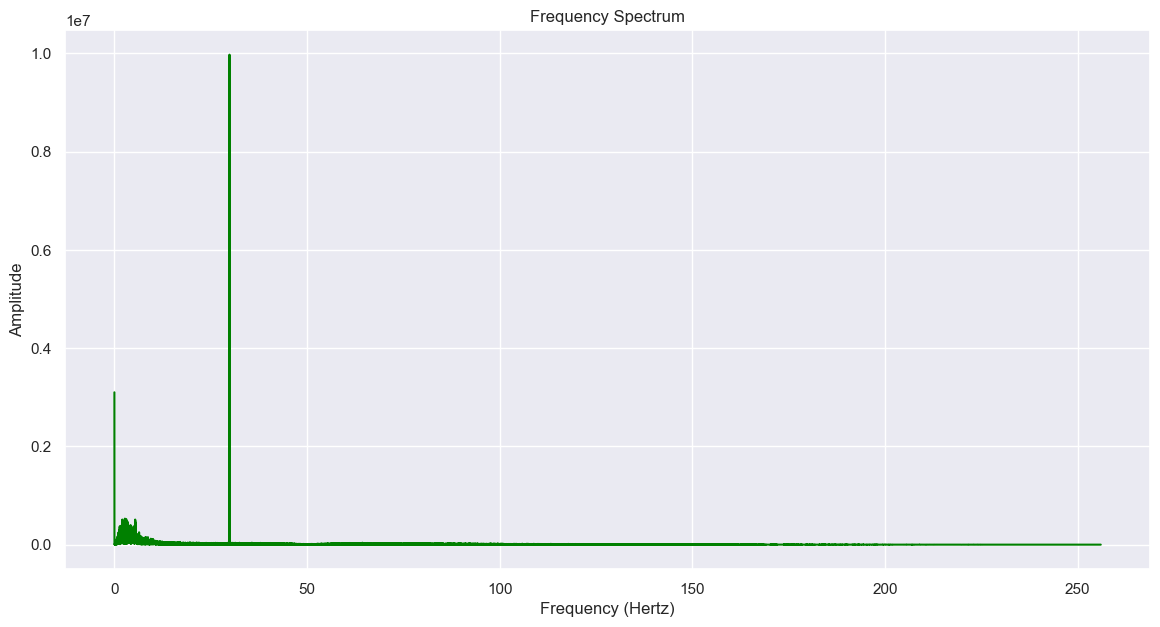

In [71]:
Fs = 512.0

normalized_signal = eeg

N = len(normalized_signal)

# Creo una secuencia de N puntos (el largo de EEG), de 0 hasta el largo de la secuencia en segundos (N/Fs).
x = np.linspace(0.0, int(N/Fs), N)   

# A esa secuencia de EEG le agrego una señal pura de 30 Hz.  Estoy ayuda a visualizar bien que la relación espectral está ok.
normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x)

yf = rfft(normalized_signal)
xf = rfftfreq(N, 1 / Fs)

plt.figure(figsize=(14,7))
plt.title('Frequency Spectrum')
plt.plot(xf, np.abs(yf), color='green')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hertz)')
plt.show()

In [67]:
##utilizo signals2 que tiene los dos tramos que quiero utilizar, baseline y con tos

from collections import Counter
from scipy import stats
    
data = signals2.values
eeg = data[:,2]
features=[]

ptp = abs(np.max(eeg)) + abs(np.min(eeg))
features.insert(1,ptp)

rms = np.sqrt(np.mean(eeg**2))
features.insert(1,rms)

cf = crest_factor(eeg)
features.insert(1,cf)

entropy = stats.entropy(list(Counter(eeg).values()), base=2)
features.insert(1,entropy)

activity, complexity, morbidity = hjorth(eeg)
features.insert(1,activity)
features.insert(1,complexity)
features.insert(1,morbidity)
fractal = pfd(eeg)
features.insert(1,fractal)

features

[1204,
 1.0099829604781858,
 5.3790060549182,
 0.19083854613395274,
 9696.648270222293,
 7.793417495270067,
 7.007099257587558,
 98.47156071791639]

In [65]:
ptp = abs(np.max(eeg)) + abs(np.min(eeg))
rms = np.sqrt(np.mean(eeg**2))
cf = crest_factor(eeg)

print ('Peak-To-Peak:' + str(ptp))
print ('Root Mean Square:' + str(rms))
print ('Crest Factor:' + str(cf))

Peak-To-Peak:1204
Root Mean Square:98.47156071791639
Crest Factor:7.007099257587558
